In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Loading the dataset
df = pd.read_excel("C:/Users/Ansh/Desktop/Main Flow/US_videos_Task4.xlsx")

In [3]:
# Data Overview before performing operations
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
# Basic Data Cleaning and Preprocessing
df.drop_duplicates(inplace=True)
df.shape

(40901, 16)

In [5]:
# Converting date columns to datetime objects
df['trending_date'] = df['trending_date'].apply(lambda x: datetime.strptime(x, '%y.%d.%m'))
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [6]:
# Extracting additional date features
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour

In [7]:
# Mapping category IDs to category names
category_mapping = {
    1: 'Film and Animation', 2: 'Autos and Vehicles', 10: 'Music', 15: 'Pets and Animals', 17: 'Sports',
    19: 'Travel and Events', 20: 'Gaming', 22: 'People and Blogs', 23: 'Comedy', 24: 'Entertainment',
    25: 'News and Politics', 26: 'How to and Style', 27: 'Education', 28: 'Science and Technology',
    29: 'Non Profits and Activism', 30: 'Movies', 43: 'Shows'
}

df['category_name'] = df['category_id'].map(category_mapping)

In [8]:
# Data Overview after performing operations
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40901 non-null  object             
 1   trending_date           40901 non-null  datetime64[ns]     
 2   title                   40901 non-null  object             
 3   channel_title           40901 non-null  object             
 4   category_id             40901 non-null  int64              
 5   publish_time            40901 non-null  datetime64[ns, UTC]
 6   tags                    40901 non-null  object             
 7   views                   40901 non-null  int64              
 8   likes                   40901 non-null  int64              
 9   dislikes                40901 non-null  int64              
 10  comment_count           40901 non-null  int64              
 11  thumbnail_link          40901 non-null  object

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,13,17,People and Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,12,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,11,13,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,11,12,18,Entertainment


C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


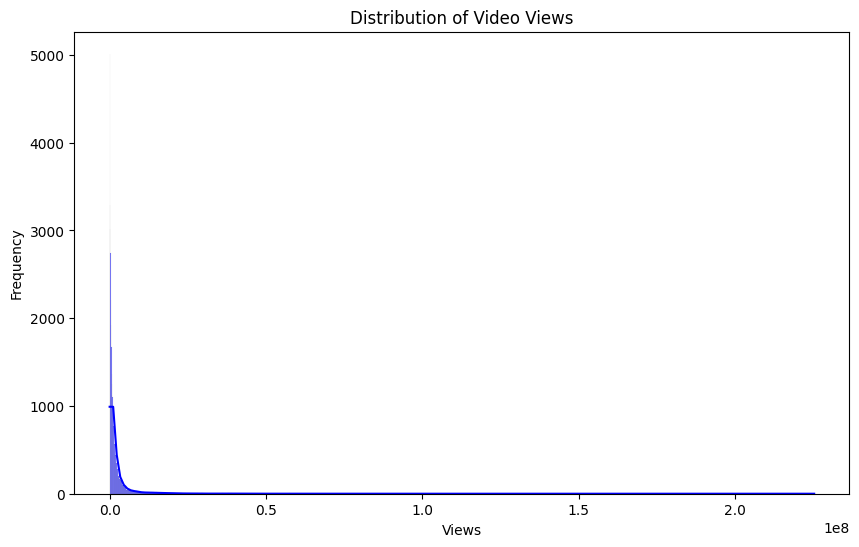

In [9]:
# Visualization 1: Distribution of Video Views
plt.figure(figsize=(10,6))
sns.histplot(df['views'], kde=True, color='blue')
plt.title('Distribution of Video Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

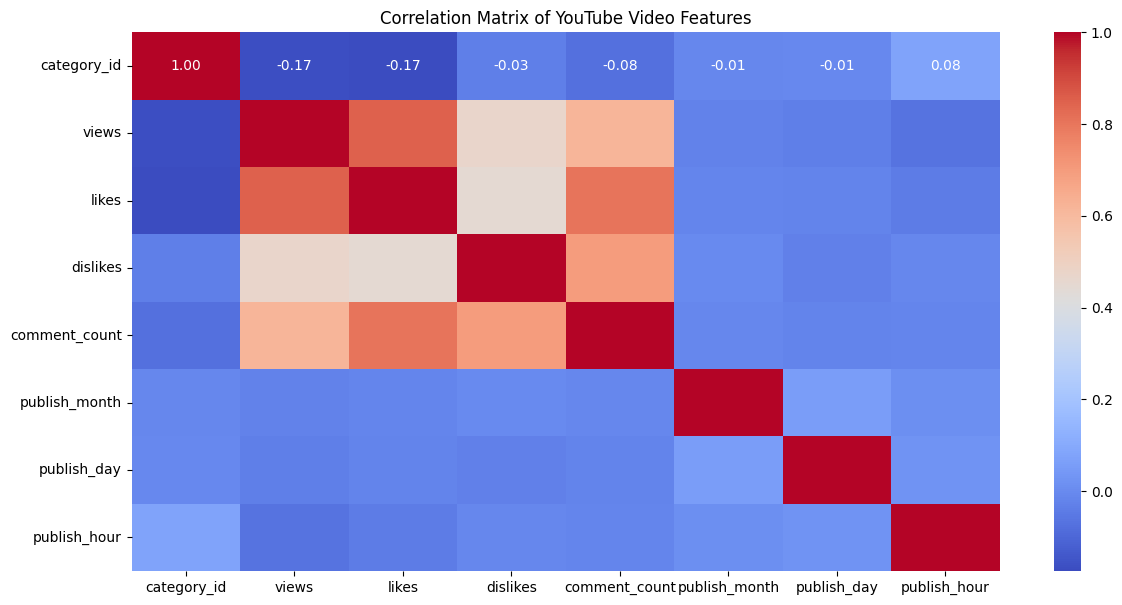

In [10]:
# Visualization 2: Correlation Matrix
plt.figure(figsize=(14,7))
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of YouTube Video Features')
plt.show()

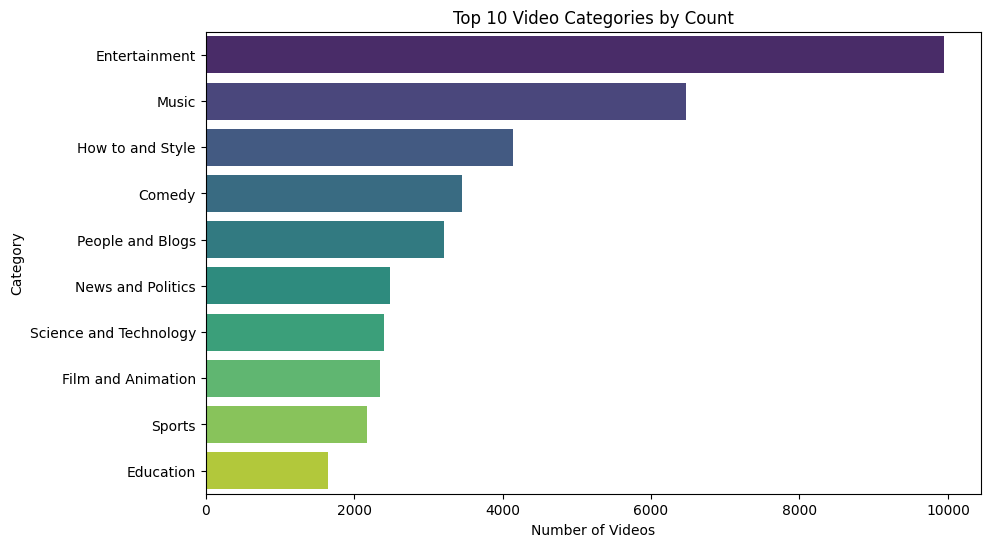

In [11]:
# Visualization 3: Top 10 Categories by Video Count
top_categories = df['category_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Video Categories by Count')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

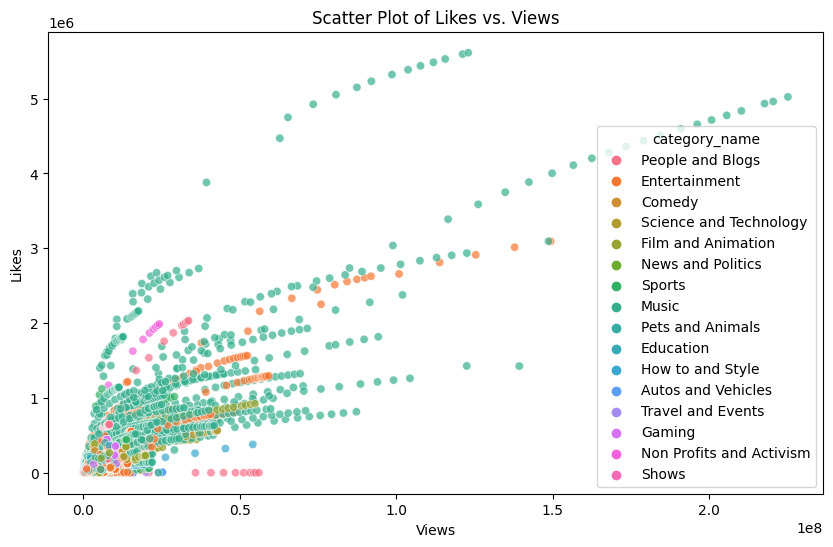

In [12]:
# Visualization 4: Scatter Plot of Likes vs. Views
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='views', y='likes', hue='category_name', alpha=0.7)
plt.title('Scatter Plot of Likes vs. Views')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

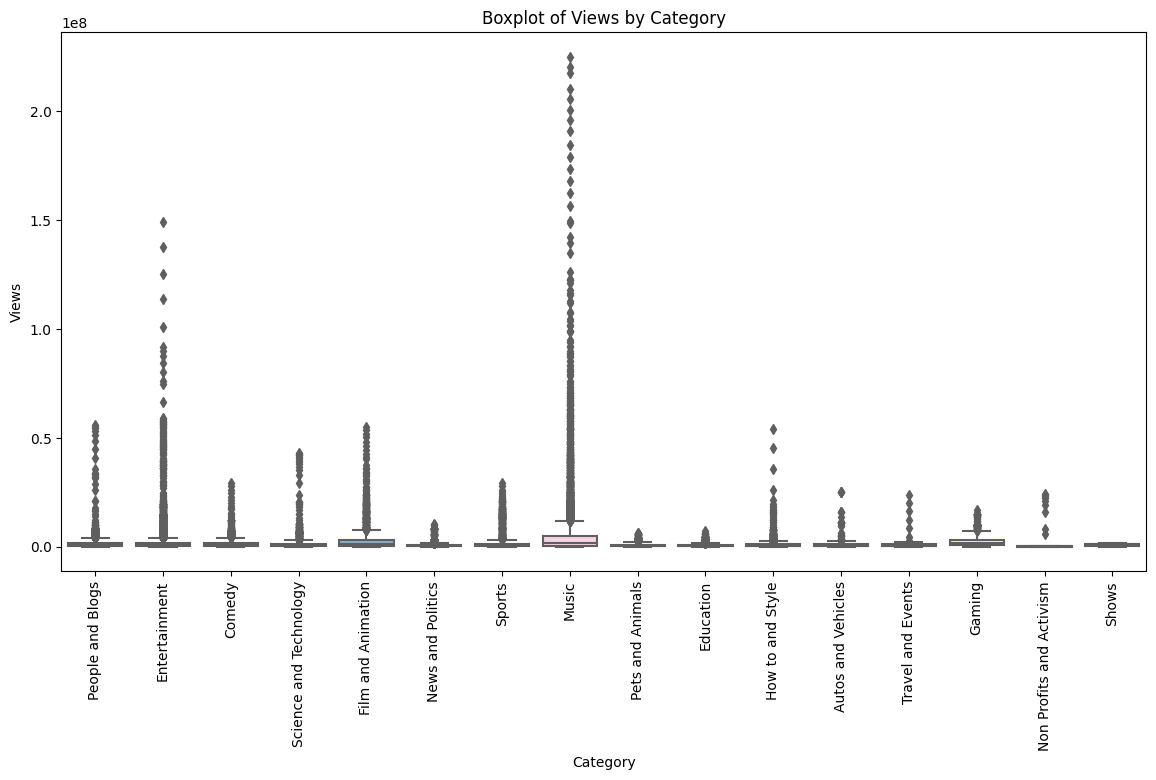

In [13]:
# Visualization 5: Boxplot of Views by Category
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='category_name', y='views', palette='Set3')
plt.xticks(rotation=90)
plt.title('Boxplot of Views by Category')
plt.xlabel('Category')
plt.ylabel('Views')
plt.show()

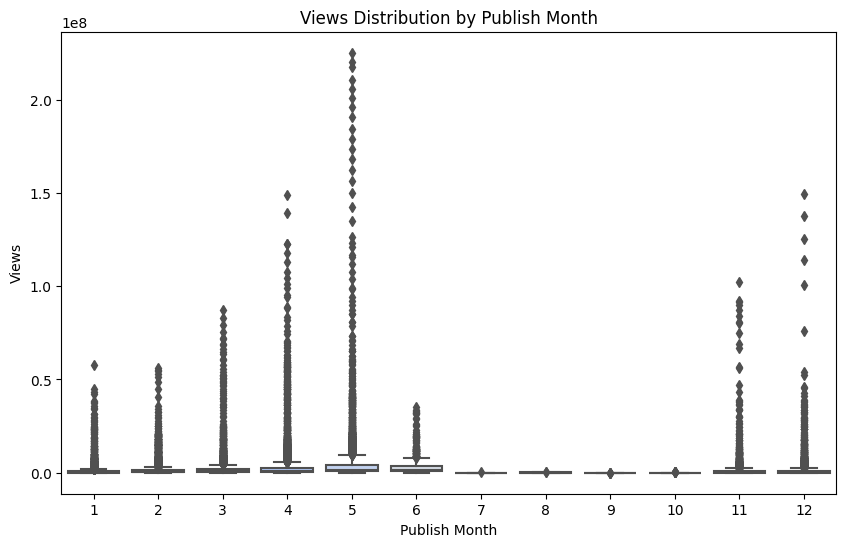

In [14]:
# Visualization 6: Views Distribution by Publish Month
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='publish_month', y='views', palette='coolwarm')
plt.title('Views Distribution by Publish Month')
plt.xlabel('Publish Month')
plt.ylabel('Views')
plt.show()

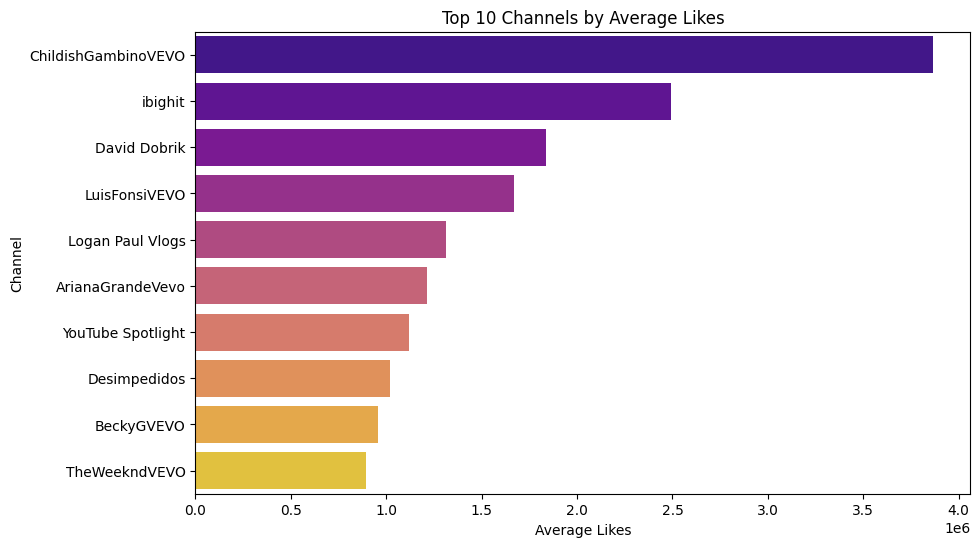

In [15]:
# Visualization 7: Top 10 Channels by Average Likes
top_channels = df.groupby('channel_title')['likes'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='plasma')
plt.title('Top 10 Channels by Average Likes')
plt.xlabel('Average Likes')
plt.ylabel('Channel')
plt.show()


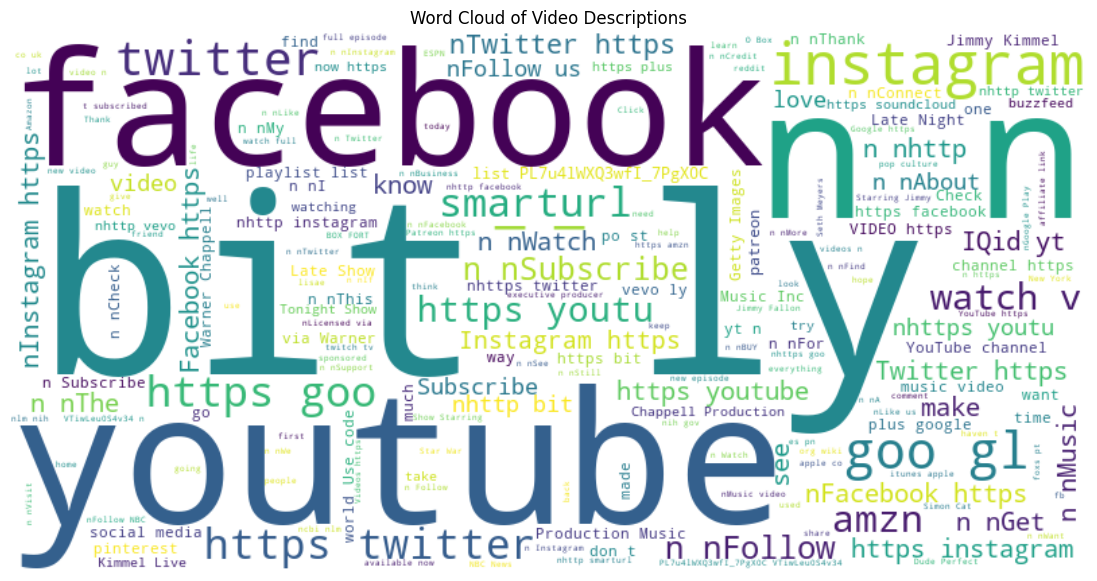

In [16]:
# Visualization 8: Word Cloud of Video Descriptions
from wordcloud import WordCloud

text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Descriptions')
plt.show()